In [112]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [113]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [114]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [116]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Exploratory Analysis

Amount of fully paid x charged off. More observations fully paid.

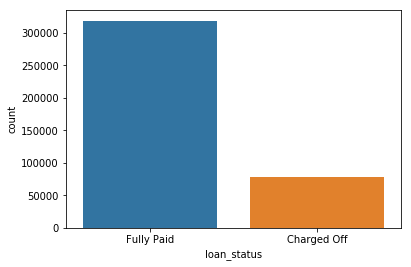

In [117]:
sns.countplot(x = 'loan_status', data = df)

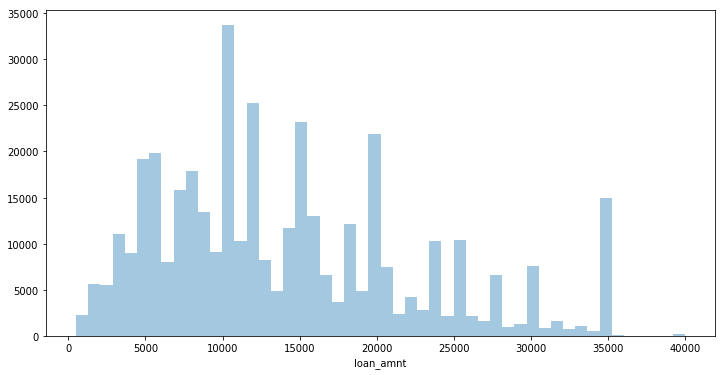

In [118]:
plt.figure(figsize = (12,6))
sns.distplot(df['loan_amnt'], kde = False)

Correlation between continuous values

In [119]:
df.corr()[['loan_amnt', 'int_rate','installment']]

,loan_amnt,int_rate,installment
loan_amnt,1.000000,0.168921,0.953929
int_rate,0.168921,1.000000,0.162758
installment,0.953929,0.162758,1.000000
annual_inc,0.336887,-0.056771,0.330381
dti,0.016636,0.079038,0.015786
open_acc,0.198556,0.011649,0.188973
pub_rec,-0.077779,0.060986,-0.067892
revol_bal,0.328320,-0.011280,0.316455
revol_util,0.099911,0.293659,0.123915
total_acc,0.223886,-0.036404,0.202430


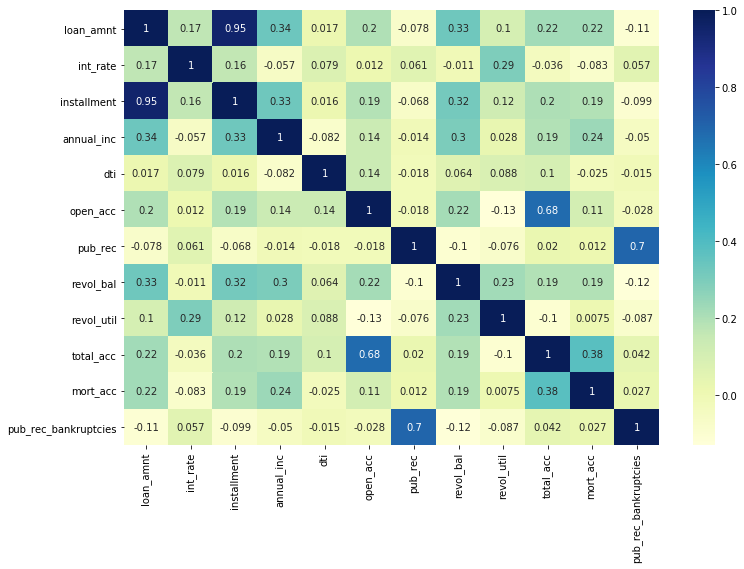

In [120]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot =True,  cmap= 'YlGnBu')

High correlations between installment and loan_amnt...

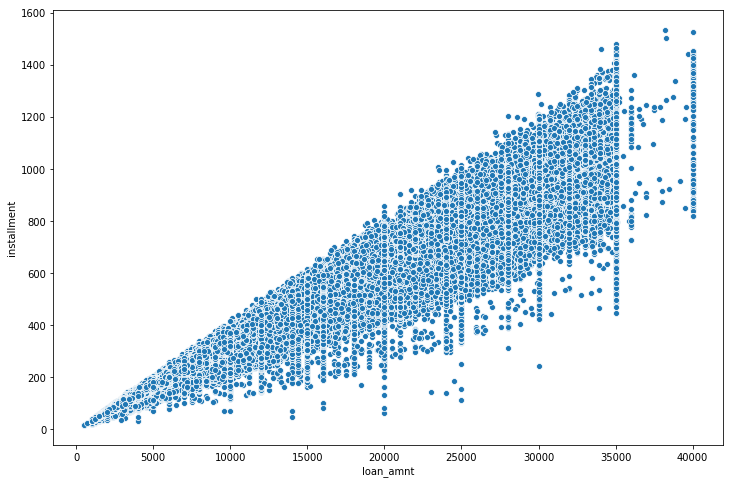

In [121]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'loan_amnt', y = 'installment', data =df)

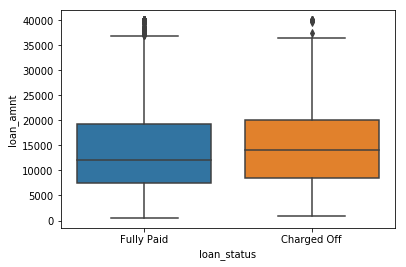

In [122]:
sns.boxplot(x = 'loan_status', y  ='loan_amnt', data = df)

In [123]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [124]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [125]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

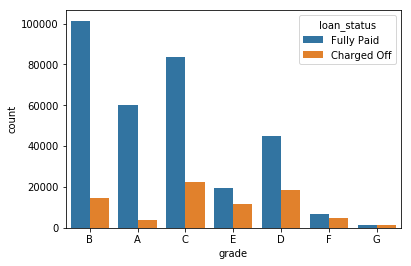

In [126]:
sns.countplot(x = 'grade', hue ='loan_status', data = df)

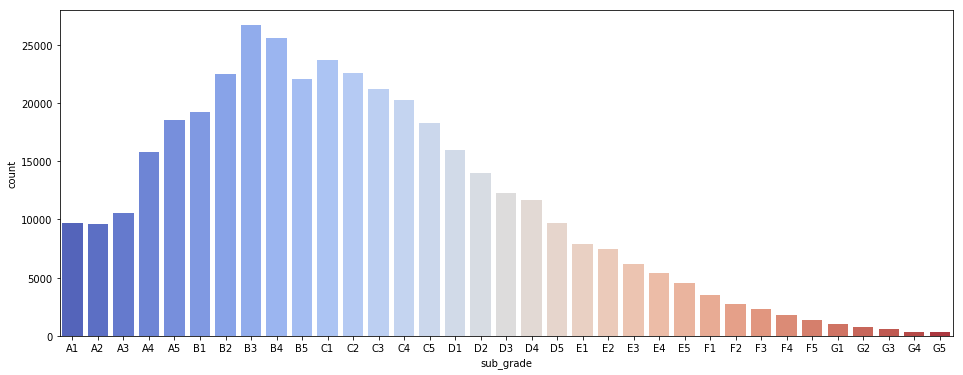

In [127]:
plt.figure(figsize = (16, 6))
sns.countplot(x = 'sub_grade', data = df.sort_values(by = 'sub_grade'), palette = 'coolwarm')

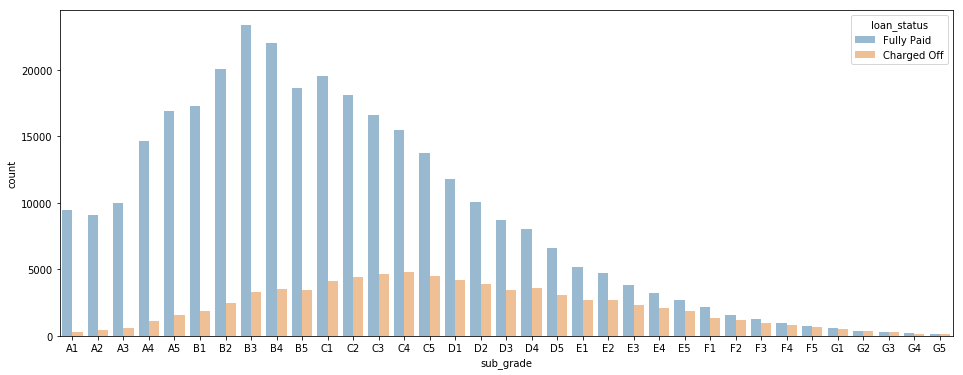

In [128]:
plt.figure(figsize = (16,6))
sns.countplot(x = 'sub_grade', data = df.sort_values(by = 'sub_grade'),hue = 'loan_status', alpha = 0.5)

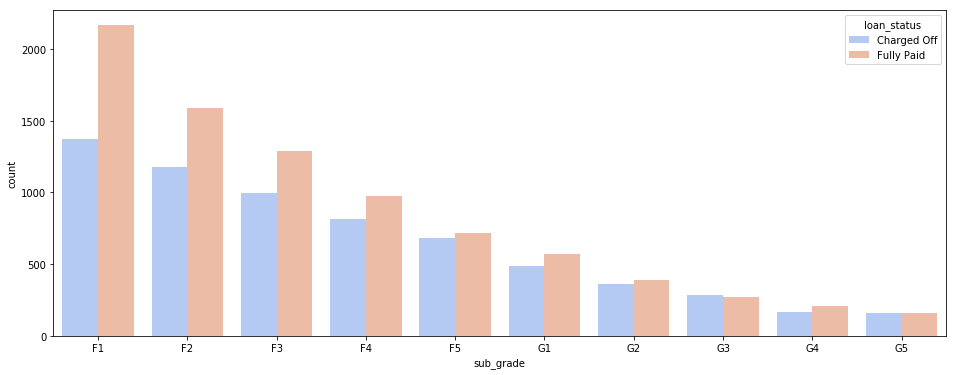

In [129]:
df_fng = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize = (16,6))
sns.countplot(x = 'sub_grade', data = df_fng.sort_values(by = 'sub_grade'),
              palette = 'coolwarm', hue = 'loan_status')

In [130]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [131]:
df[['loan_repaid', 'loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


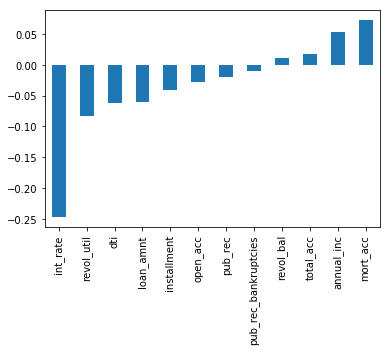

In [132]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

### Data PreProcessing

In [133]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


Porcentage of missing data on the dataset

In [134]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [135]:
df['emp_title'].nunique()

173105

In [136]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
Sales                                       1638
Project Manager                             1505
Owner                                       1410
Driver                                      1339
Office Manager                              1218
manager                                     1145
Director                                    1089
General Manager                             1074
Engineer                                     995
teacher                                      962
driver                                       882
Vice President                               857
Operations Manager                           763
Administrative Assistant                     756
Accountant                                   748
President           

for now, lets remove it. to many unique to fix null values

In [137]:
df.drop('emp_title', axis = 1, inplace = True)

Check another feature. Emp_length

In [138]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [139]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

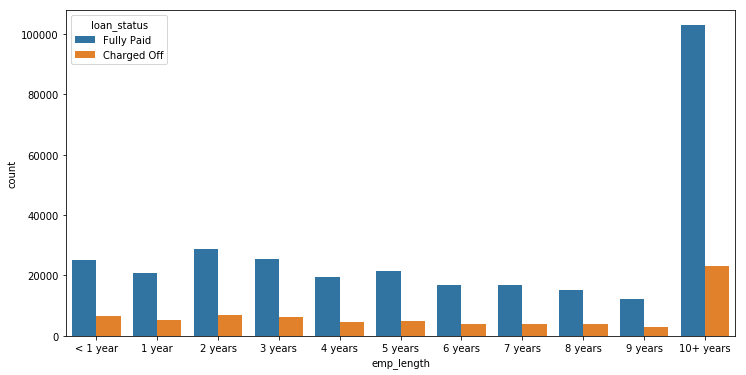

In [140]:
plt.figure(figsize = (12,6))
sns.countplot(x='emp_length', data = df, order = emp_length_order, 
             hue = 'loan_status')

Lets check the proportion along emp_length 

In [141]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [142]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [143]:
emp_len = emp_co/(emp_fp+ emp_co)

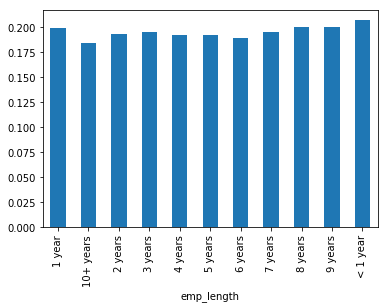

In [144]:
emp_len.plot(kind = 'bar')

That is not a huge difference between.

In [145]:
df.drop('emp_length', axis = 1, inplace = True) #remove it

In [146]:
df.isnull().sum() # null values remaning

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Next feature

In [147]:
df.drop('title', axis =1, inplace = True)

Mort_acc feature..

In [148]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [149]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Correlation between total_acc and mortal_acc

In [150]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [151]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [152]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [153]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [154]:
df.dropna(inplace = True)

In [155]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Values

In [156]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Term Feature

In [157]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [158]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [159]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

Grade Feature / Sub_grade: Grade is part of sub_grade

In [160]:
df.drop('grade',axis = 1, inplace = True)

In [161]:
dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

df = pd.concat([df.drop('sub_grade', axis = 1), dummies], axis = 1)

In [162]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


Verification_status, application_type, initial_list_status, porpose features

In [163]:
dummies = pd.get_dummies(df[['verification_status', 'purpose',
       'initial_list_status', 'application_type']], drop_first = True)

df = pd.concat([df.drop(['verification_status', 'purpose',
       'initial_list_status', 'application_type'], axis = 1), dummies], axis = 1)

Home_ownership

In [164]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [165]:
#replacing 
df['home_ownership']= df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [166]:
dummies = pd.get_dummies(df['home_ownership'], drop_first = True)

df = pd.concat([df.drop('home_ownership', axis = 1), dummies], axis = 1)

Address feature

In [167]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [168]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [169]:
dummies = pd.get_dummies(df['zip_code'], drop_first = True)

df = pd.concat([df.drop('zip_code', axis = 1), dummies], axis = 1)

In [170]:
df.drop('address', axis = 1, inplace = True)

issue_d feature

In [171]:
df.drop('issue_d', axis = 1, inplace = True) #data leak

earlist_cr_line

In [172]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda data: int(data[-4:]))

In [173]:
df['earliest_cr_line'].head()

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64

## Train and Test Split

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
loan_amnt                              395219 non-null float64
term                                   395219 non-null int64
int_rate                               395219 non-null float64
installment                            395219 non-null float64
annual_inc                             395219 non-null float64
loan_status                            395219 non-null object
dti                                    395219 non-null float64
earliest_cr_line                       395219 non-null int64
open_acc                               395219 non-null float64
pub_rec                                395219 non-null float64
revol_bal                              395219 non-null float64
revol_util                             395219 non-null float64
total_acc                              395219 non-null float64
mort_acc                               395219 non-null float64
pub_rec_bank

In [176]:
df.drop('loan_status', axis = 1, inplace = True)

In [177]:
X = df.drop('loan_repaid', axis = 1).values

In [178]:
y = df['loan_repaid'].values

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

Normalizing data

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scaler = MinMaxScaler()

In [184]:
X_train = scaler.fit_transform(X_train)

In [185]:
X_test = scaler.transform(X_test)

In [187]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [188]:
X_train.shape

(316175, 78)

In [ ]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [ ]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256, 
          validation_data = (X_test, y_test))

### Evaluating Model

In [192]:
losses = pd.DataFrame(model.history.history)

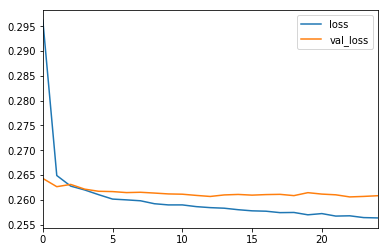

In [193]:
losses.plot()

In [195]:
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
pred = model.predict_classes(X_test)

In [197]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6781  8877]
 [   57 63329]]


Checking on a 'new' customer

In [206]:
import random
random.seed(101)
random_ind = random.randint(0, len(df))
new_customer = df.drop('loan_repaid', axis = 1).iloc[random_ind]


In [207]:
new_customer = scaler.transform(new_customer.values.reshape(1, 78))

In [208]:
model.predict_classes(new_customer)

array([[1]])

In [209]:
df.iloc[random_ind]['loan_repaid']

1.0